# Credit Score Classification

In [27]:
# Chargement des principales librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings                                  
warnings.filterwarnings('ignore')

### Description du jeu de données

In [28]:
data = pd.read_csv(r"C:\Users\johan\Documents\MASTER ESA\My_github\Credit Score Classification\Credit-Score-Data\train.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [29]:
data.shape

(100000, 28)

La base comprend 100000 individus.

Les caractéristiques décrivant les individus dans ce contexte sont : 

| Column Name               | Description                                                        |
|---------------------------|--------------------------------------------------------------------|
| ID                        | Identifiant unique de l'enregistrement                              |
| Customer_ID               | Identifiant unique du client                                       |
| Month                     | Mois de l'année                                                    |
| Name                      | Nom du client                                                 |
| Age                       | Âge du client                                                 |
| SSN                       | Numéro de sécurité sociale du client                          |
| Occupation                | Profession du client                                         |
| Annual_Income             | Revenu annuel du client                                       |
| Monthly_Inhand_Salary     | Salaire mensuel net du client                                 |
| Num_Bank_Accounts         | Nombre de comptes bancaires du client                         |
| Num_Credit_Card           | Nombre de cartes de crédit détenues par le client                 |
| Interest_Rate             | Taux d'intérêt sur la carte de crédit du client                |
| Num_of_Loan               | Nombre de prêts contractés par le client auprès de la banque      |
| Type_of_Loan              | Types de prêts contractés par le client auprès de la banque       |
| Delay_from_due_date       | Nombre moyen de jours de retard du client par rapport à la date d'échéance |
| Num_of_Delayed_Payment    | Nombre de paiements retardés par le client                        |
| Changed_Credit_Card       | Variation en pourcentage de la limite de la carte de crédit du client |
| Num_Credit_Inquiries      | Nombre de demandes de crédit par le client                       |
| Credit_Mix                | Niveau de diversification du portefeuille de crédit du client                       |
| Outstanding_Debt          | Solde impayé de la personne                                        |
| Credit_Utilization_Ratio  | Ratio d'utilisation du crédit de la carte de crédit du client       |
| Credit_History_Age        | Âge de l'historique de crédit du client                        |
| Payment_of_Min_Amount     | Oui si le client a payé seulement le montant minimum dû, sinon non |
| Total_EMI_per_month       | Total des EMI (Equated Monthly Installments) par mois du client |
| Amount_invested_monthly  | Montant investi mensuellement par la personne                      |
| Payment_Behaviour         | Comportement d'achat du client                             |
| Monthly_Balance           | Solde mensuel restant sur le compte du client                  |
| Credit_Score              | Score de crédit du client                                     |
```
    

In [30]:
data["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Selon notre jeu de données, les banques utilisent trois scores de crédit pour évaluer leurs clients :

- Good : clients présentant un risque faible 
- Standard 
- médiocre : clients présentant un risque élevé

In [31]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Le base ne contient pas de valeurs manquantes.

In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Passons maintenant à l'analyse exploratoire

### Analyse exploratoire

Nous analysons maintenant la relation entre le score de crédit et les différentes caractéristiques.

- **La profession exercée et le score de crédit**

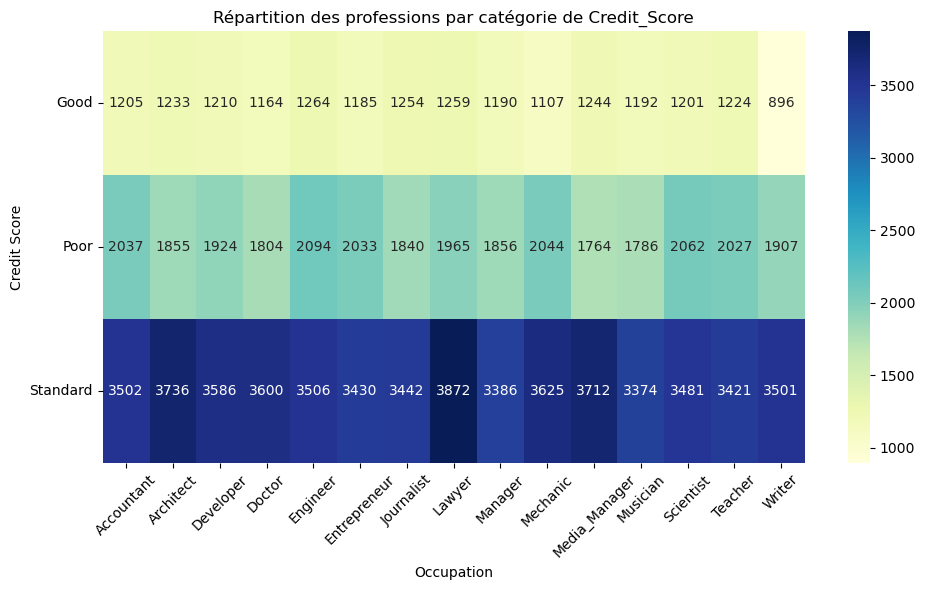

In [33]:
# Création d'un tableau croisé dynamique 
ct = pd.crosstab(data['Credit_Score'], data['Occupation'])

# Visualisation avec seaborn 
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='YlGnBu', cbar=True, fmt='g')
plt.title('Répartition des professions par catégorie de Credit_Score')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

On constate que dans l'ensemble, les professions sont équitablement réparties dans chaque catégorie de score.
On peut dire que la profession ou le métier exercé par les individus n'influencerait pas leur score de crédit.

- **Le revenu et le score de crédit**

Voyons maintenant si le revenu annuel ou mensuel des individus impacte ou non leur score de crédit.

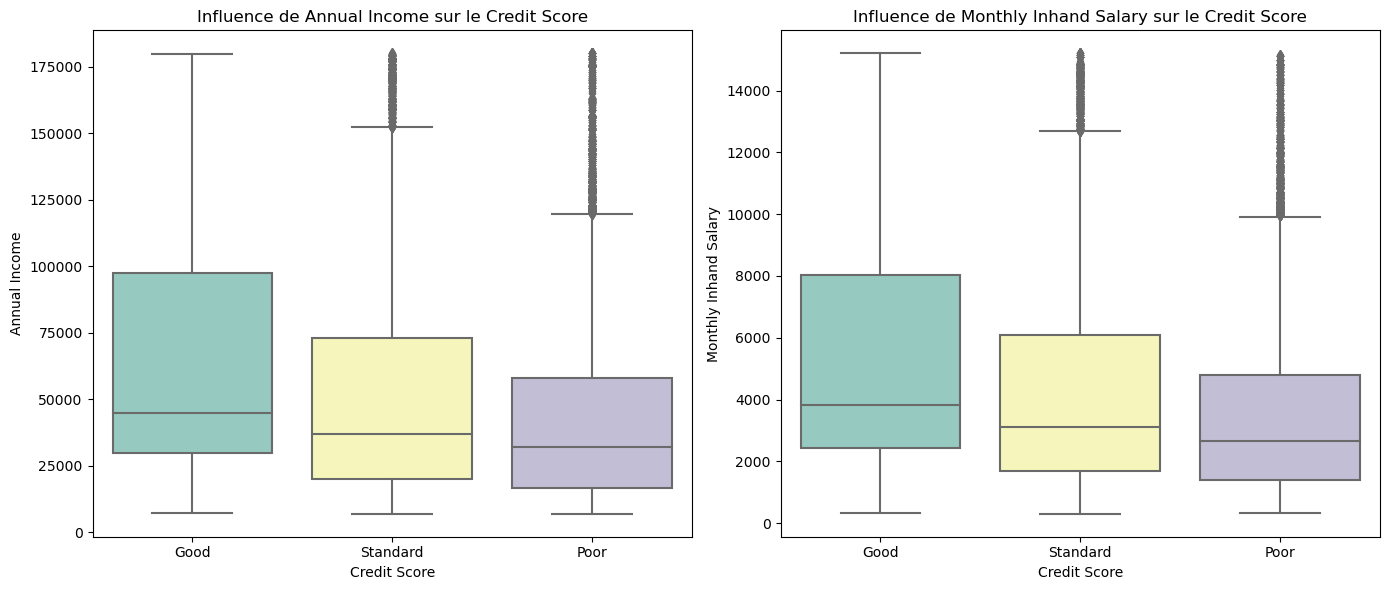

In [34]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))

# Le Boxplot pour Annual_Income
sns.boxplot(x='Credit_Score', y='Annual_Income', data=data, ax=axes[0], palette='Set3')
axes[0].set_title('Influence de Annual Income sur le Credit Score')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Annual Income')

# Boxplot pour Monthly_Inhand_Salary
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=data, ax=axes[1], palette='Set3')
axes[1].set_title('Influence de Monthly Inhand Salary sur le Credit Score')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Monthly Inhand Salary')

plt.tight_layout()
plt.show()

Comme on s'y attendait plus le salaire est élevé, plus le score de crédit est meilleur.

- **Le nombre de compte bancaire , le nombre de carte de crédits et le score de crédit**

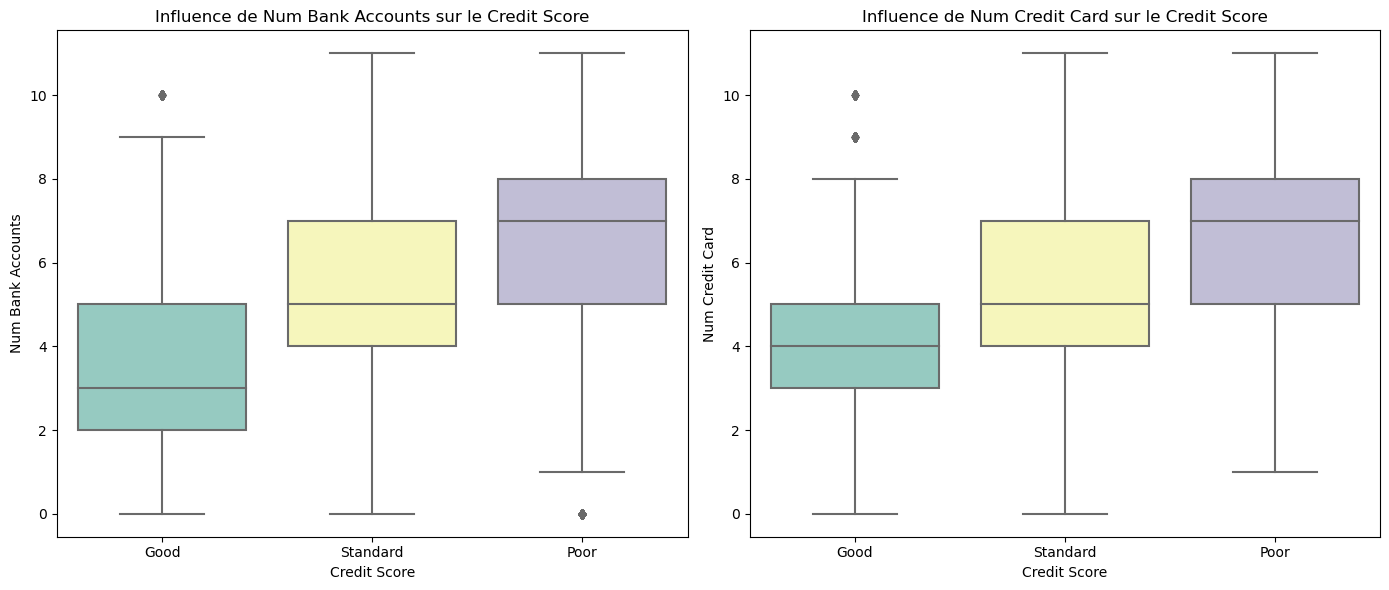

In [35]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))

# Boxplot pour Num_Bank_Accounts
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=data, ax=axes[0], palette='Set3')
axes[0].set_title('Influence de Num Bank Accounts sur le Credit Score')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Num Bank Accounts')

# Boxplot pour Num_Credit_Card
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=data, ax=axes[1], palette='Set3')
axes[1].set_title('Influence de Num Credit Card sur le Credit Score')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Num Credit Card')

plt.tight_layout()
plt.show()

- Un faible nombre de comptes bancaires est associé à un bon score de crédit.

- De même, un faible nombre de cartes de crédit est associé à un bon score de crédit.

- **Le score de crédit et les autres variables**

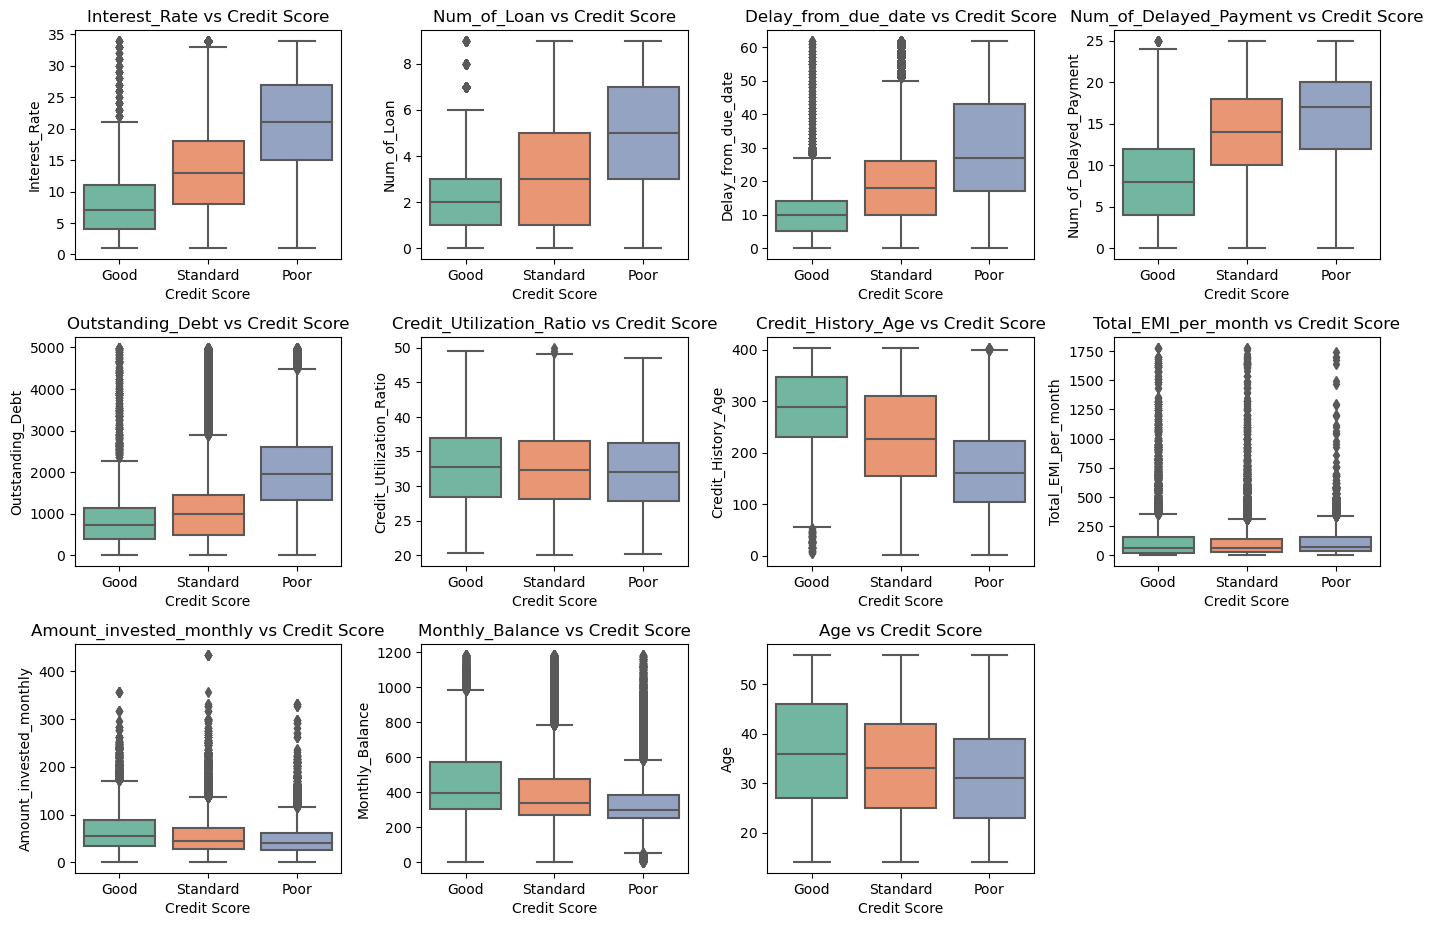

In [36]:
exploratory_vars = ['Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                      'Outstanding_Debt',
                    'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance',"Age"]

plt.figure(figsize=(14, 12))
for i, var in enumerate(exploratory_vars, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Credit_Score', y=var, data=data, palette='Set2')
    plt.title(f'{var} vs Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

De ces boxplots, nous pouvons dire : 
    
- Un faible taux d'intéret entre 4 et 11% est associé à un bon score. Au delà de 15%, cela est généralement associé à mauvais score (poor).

- Les individus ayant un faible nombre de crédit (entre 1-3) ont un bon score. Au delà de 3-4 crédits, cela est généralement associé à un mauvais score.

- Les personnes avec un score de crédit "Good" ont des retards de paiement beaucoup plus faibles comparativement aux clients "Standard" et "Poor". 

- Les clients avec un bon score ont moins de paiements retardés. Un nombre élevé de paiments retardés influencerait négativement
le score de crédit.

- Le montant de la dette en cours est plus faible chez les clients avec un bon score.Il est plus élevé pour les scores "Standard" et encore plus pour les scores "Poor".

- Le ratio d'utilisation du crédit n'affecterait pas le score des clients.

- Les clients avec un bon score ont généralement un historique de crédit plus long. Les clients "Standard" et "Poor" montrent une plus grande variabilité et une tendance à avoir des historiques de crédit plus courts.

- Le total des échéances mensuels des clients n'affecterait pas leur score de crédit.

- Le montant qu'investisse les clients chaque mois n'aurait pas vraiment d'incidence sur leur score.

- Le solde mensuel de la carte de crédit semble affecter le score. Un solde élevé favoriserait un bon score.

- Le score de crédit tend à croître avec l'âge. Plus on devient âgé, plus le score devient meilleur.


Le modèle de classification prendra en compte uniquement les variables qui influenceraient le score de crédit des clients.

Une autre caractéristique importante de l'ensemble de données est la variable **Credit_Mix**.

D'une manière générale, elle mesure le niveau de diversification du portefeuille de crédit des clients. Démontrer que vous pouvez gérer de 
manière responsable différents types de crédit peut indiquer que vous êtes un emprunteur fiable. Comme vous ouvrez 
naturellement différents comptes de crédit au fil du temps, une bonne combinaison de crédit peut vous aider à porter
votre score de crédit à un niveau excellent.

In [37]:
data['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

Les individus sont également classés en 3 catégories en fonction du niveau de diversification de leur portefeuille de crédit (Bad - Standard - Good)

Etant donnée que cette colonne est catégorielle, nous la transformons en numérique afin de l'utiliser pour entraîner notre 
modèle.

In [38]:
data['Credit_Mix'] = data["Credit_Mix"].map({"Bad" : 0 ,"Standard" : 1, "Good":2})

Avant de passer l'implémantation du modèle, nous divisons les données en deux sous-ensembles : échantillon d'apprentissage et 
échantillon test.

**L'échantillon d'apprentissasge** sera utilisé pour entraîner le modèle et **l'échantillon test** servira à évaluer la performance du modèle.

In [39]:
from sklearn.model_selection import train_test_split

#Séparation des caractéristiques et de la target variable
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])

y = np.array(data[["Credit_Score"]])

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

### Credit Score Classification Model</b>

**Le Random Forest**

Le Random Forest ou forêt aléatoire est une méthode d'apprentissage supervisé qui est principalement utilisée 
pour des tâches de classification et de régression. Elle fait partie des méthodes qui combinent les prédictions
de plusieurs modèles pour obtenir une meilleure performance que celle de chaque modèle pris individuellement.

Une forêt aléatoire est constituée de nombreux arbres de décision.
Chaque arbre de décision est un modèle d'apprentissage supervisé qui apprend des règles de décision simples pour diviser les données en sous-ensembles
homogènes.
Chaque arbre dans la forêt est entraîné sur un échantillon bootstrap obtenu à partir des données d'entraînement. 
Ce processus introduit de la diversité entre les arbres, ce qui aide à réduire le surapprentissage (overfitting).

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

<b> Evaluation de la performance du modèle </b>

In [42]:
predictions = model.predict(xtest)

In [43]:
# Classification report
from sklearn.metrics import classification_report

report = classification_report(ytest, predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print('Classification Report:')
print(df_report)

Classification Report:
              precision    recall  f1-score       support
Good           0.773128  0.762189  0.767620   5866.000000
Poor           0.794730  0.832762  0.813302   9633.000000
Standard       0.827191  0.809325  0.818161  17501.000000
accuracy       0.807788  0.807788  0.807788      0.807788
macro avg      0.798350  0.801425  0.799694  33000.000000
weighted avg   0.808105  0.807788  0.807758  33000.000000


Le taux de bonnes classsification est de 80.78%. 
La proportion d'individus correctement identifiés (recall) par le modèle est assez élevé dans chacune des catégories.

Ces différents critères associés aux fortes valeurs du f1-score témoignent de la qualité du modèle.

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, predictions)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[ 4471    26  1369]
 [   21  8022  1590]
 [ 1291  2046 14164]]


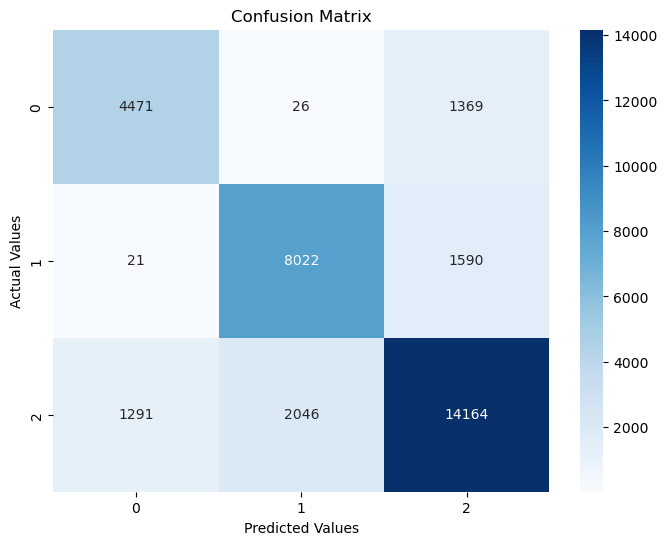

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()